### K - Means

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
df = pd.DataFrame(
    iris['data'],columns=['SL','SW','PL','PW'])
df['target'] = iris['target']
df.head()

,SL,SW,PL,PW,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


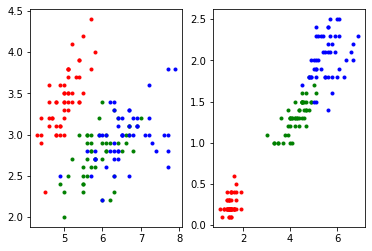

In [4]:
plt.subplot(121)
plt.plot(df['SL'][df['target']==0],df['SW'][df['target']==0],'r.')
plt.plot(df['SL'][df['target']==1],df['SW'][df['target']==1],'g.')
plt.plot(df['SL'][df['target']==2],df['SW'][df['target']==2],'b.')
plt.subplot(122)
plt.plot(df['PL'][df['target']==0],df['PW'][df['target']==0],'r.')
plt.plot(df['PL'][df['target']==1],df['PW'][df['target']==1],'g.')
plt.plot(df['PL'][df['target']==2],df['PW'][df['target']==2],'b.')



#### K - means clustering

In [5]:
from sklearn.cluster import KMeans
model  = KMeans(n_clusters =3, max_iter= 200)
model.fit(df[['SL','SW','PL','PW']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
model.labels_
df['pred'] = model.predict(df[['SL','SW','PL','PW']])
df.head()
#1. Target 0 1 2 == 1 0 2 => prediksi 1 0 2
#2. ++ iterasi k means

,SL,SW,PL,PW,target,pred
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


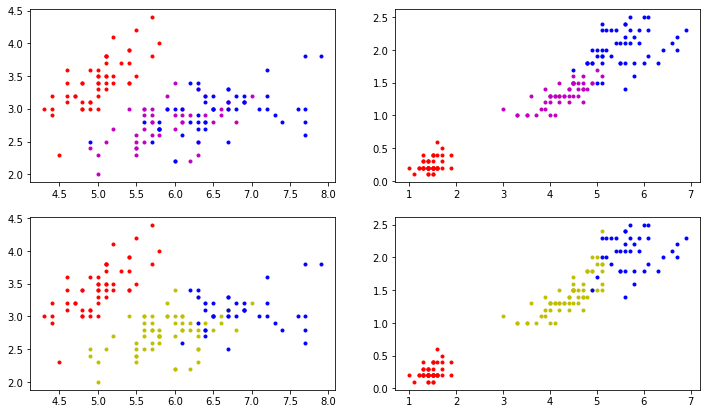

In [7]:
plt.figure(figsize=(12,7))
plt.subplot(221)
plt.plot(df['SL'][df['target'] == 0],df['SW'][df['target']==0],'r.')
plt.plot(df['SL'][df['target'] == 1],df['SW'][df['target']==1],'m.')
plt.plot(df['SL'][df['target'] == 2],df['SW'][df['target']==2],'b.')

plt.subplot(222)
plt.plot(df['PL'][df['target'] == 0],df['PW'][df['target']==0],'r.')
plt.plot(df['PL'][df['target'] == 1],df['PW'][df['target']==1],'m.')
plt.plot(df['PL'][df['target'] == 2],df['PW'][df['target']==2],'b.')

plt.subplot(223)
plt.plot(df['SL'][df['pred'] == 0],df['SW'][df['pred']==0],'r.')
plt.plot(df['SL'][df['pred'] == 1],df['SW'][df['pred']==1],'y.')
plt.plot(df['SL'][df['pred'] == 2],df['SW'][df['pred']==2],'b.')

plt.subplot(224)
plt.plot(df['PL'][df['pred'] == 0],df['PW'][df['pred']==0],'r.')
plt.plot(df['PL'][df['pred'] == 1],df['PW'][df['pred']==1],'y.')
plt.plot(df['PL'][df['pred'] == 2],df['PW'][df['pred']==2],'b.')

In [8]:
# Centroids
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

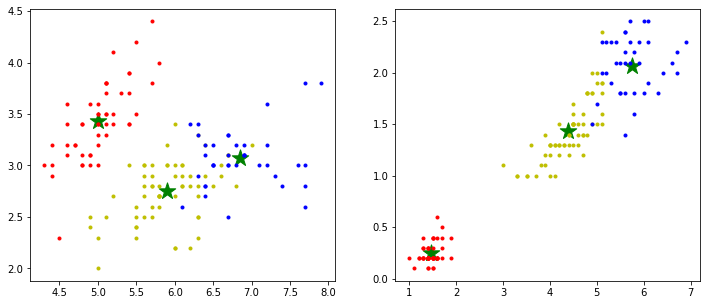

In [9]:

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(model.cluster_centers_[:,0],
           model.cluster_centers_[:,1],
           color ='green',marker='*',s=300)

plt.plot(df['SL'][df['pred'] == 0],df['SW'][df['pred']==0],'r.')
plt.plot(df['SL'][df['pred'] == 1],df['SW'][df['pred']==1],'y.')
plt.plot(df['SL'][df['pred'] == 2],df['SW'][df['pred']==2],'b.')

plt.subplot(122)
plt.scatter(model.cluster_centers_[:,2],
           model.cluster_centers_[:,3],
           color ='green',marker='*',s=300)

plt.plot(df['PL'][df['pred'] == 0],df['PW'][df['pred']==0],'r.')
plt.plot(df['PL'][df['pred'] == 1],df['PW'][df['pred']==1],'y.')
plt.plot(df['PL'][df['pred'] == 2],df['PW'][df['pred']==2],'b.')

In [10]:
k = range(1,15)
inertia = []
for i in k:
    model1 =KMeans(n_clusters = i)
    model1.fit(df[['SL','SW','PL','PW']])
    inertia.append(model1.inertia_)

print(inertia)

[681.3706, 152.34795176035792, 78.85144142614601, 57.25600931571815, 46.44618205128205, 39.2865051948052, 34.39532640692641, 30.185072738664847, 28.22209307359308, 26.442395789665984, 24.305938923821277, 23.570413883502123, 21.60028806303663, 20.25636150107203]


Text(4, 200, 'Best k value = 3')

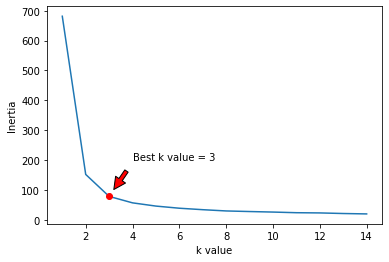

In [11]:
plt.plot(k,inertia)
plt.xlabel('k value')
plt.ylabel('Inertia')
plt.plot(k[2],inertia[2],'ro')
plt.annotate('Best k value = 3',xy=(k[2],inertia[2]),
            xytext=(4,200),arrowprops=dict(facecolor='red',shrink=0.2))

### Evaluation Metrics

In [12]:
from sklearn import metrics

In [14]:
# Contingency Matrix
metrics.cluster.contingency_matrix(df['target'],df['pred'])

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

In [15]:
metrics.confusion_matrix(df['target'],df['pred'])

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

In [13]:
# Adjusted rendom index => similarity
metrics.adjusted_rand_score(df['target'],df['pred'])

0.7302382722834697

In [16]:
# Mutual information score => agreement
print(metrics.adjusted_mutual_info_score(df['target'],df['pred']))

0.7551191675800484


In [17]:
# Homogenitas / homogeneity
metrics.homogeneity_score(df['target'],df['pred'])

0.7514854021988338

In [18]:
# Completeness / komplisitas 
metrics.completeness_score(df['target'],df['pred'])

0.7649861514489815

In [19]:
# Rata - rata harmonis homogenitas & komplisitas : v-Measure
metrics.v_measure_score(df['target'],df['pred'])

0.7581756800057784

In [21]:
metrics.homogeneity_completeness_v_measure(df['target'],df['pred'])

(0.7514854021988338, 0.7649861514489815, 0.7581756800057784)

In [22]:
# Fowlkes-Mallows scores => TP / sqrt((TP+FP) * (TP+FN))
metrics.fowlkes_mallows_score(df['target'],df['pred'])

0.8208080729114153

<hr>

### Unknown Labels

In [24]:
# Silhouette coefficient / koef bayangan
# -1 s/d 1 => seberapa bagus model mendefinisikan cluster
metrics.silhouette_score(df[['SL','SW','PL','PW']],
                        model.labels_)

0.5528190123564091

In [25]:
# Calinski-Harabasz index : variasi rasio criterion
# Seberapa bagus  model mendefinisikan cluster
print(metrics.calinski_harabasz_score(df[['SL','SW','PL','PW']],model.labels_))

561.62775662962


In [27]:
# Davies-Bouldin Index
# Makin rendah nilainya makin bagus model dalam memisahkan cluster
metrics.davies_bouldin_score(df[['SL','SW','PL','PW']],model.labels_)

0.6619715465007528

<hr>


1. Preprocessing
    - Lihat Korelasi
    - Cleaning : 
        - Data Nan
        - Data Outlier
        - Feature tdk perlu
    - Labelling :
        - Dummy Var Pandas
        - Label Encoder, One Hot Encoder
    - Standardize:
        - Standard Scaler
        - Normalisasi(MinMax Scaler)
        - Max Abs Scaler
        - Robust Scaler
        - Normalizer
        - Quantile Transformer
        - Binarizer
    - PCA
    - Splitting
    
2. Modelling:

1. Regresi
    - Linear Regression
    - Ridge Regression
    - Polynomial Regression
    - OLS / Simple Linear Regression
    - LASSO ,Ridge, Elastic Net Regression
    - Classification Model's Regressor

2. Classification
    - Logistic Regression
    - Decision tree
    - Random Forest - Extreme Random Forest
    - Adaboost -> stump : 1 root & 2 leaf
    - KNN
    - Naive-Bayes
    - SVM Support Vector Machine -> SVC

3. Clustering
    - KMeans
    - Affinity Propagation
    - Mean Shift
    - Spectral Clustering
    - Hierarchical clustering
    - DBSCAN
    - OPTICS
    - Birch
    - Eva Metrics target OK : Contingency matrix, adjusted random index, mutual info, fowlkes-mallows, homogen, complete, v-measure
    - Eva metrics target unknown : silhouette coef, calinski-harabasz, davies-bouldin
    
4. Evaluation Metrics :
    - Regresi (Prioritas: MAE, MSE, RMSE)
    - Klasifikasi :
        - Confusion matrix(Prioritas: Recall+, Precision, F1 Score)
        - Jaccard Score
        - ROc AUC
        - Classification Report
        - Precision_recall_fscore_support
5. Inverse Tranform
6. Visualisasi
7. Deploy
    